# Project Python Foundations: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** Write the code to check the shape of the dataset and write your observations based on that. (0.5 mark)

In [3]:
df.shape

(1898, 9)

#### Observations:
The data set has 1898 rows i.e 1898 orders placed by a customer along with 9 columns that provide more information on each order

### Question 2: Write the observations based on the below output from the info() method. (0.5 mark)

In [4]:
# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
From the information, seems there is no null value, the dataframe is not missing anyvalue. All 1898 values in the 9 columns are non-null.  
The data is stored in different data types. Some of the data in the data set are numerical while others are string. More accurately,:  
**int64**:.      
order_id  
customer_id  
food_preparation_time  
delivery_time  
**float64**:.      
cost_of_the_order   
**Object**:.      
restaurant_name  
cuisine_type  
day_of_the_week  
rating

### Question 3: 'restaurant_name', 'cuisine_type', 'day_of_the_week' are object types. Write the code to convert the mentioned features to 'category' and write your observations on the same. (0.5 mark)

In [5]:
# coverting "objects" to "category" reduces the data space required to store the dataframe
# write the code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data
df[['restaurant_name', 'cuisine_type', 'day_of_the_week']]=df[['restaurant_name', 'cuisine_type', 'day_of_the_week']].astype('category')
# use info() to print a concise summary of the DataFrame
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 103.7+ KB


None

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:
The memory usuage significantly reduced from 133.6+ KB to 103.7+ KB.

### **Question 4:** Write the code to find the summary statistics and write your observations based on that. (1 mark)

In [6]:
# write your code here
df.describe() # dropped the customer_id and the order_id because they are nominal and for this analysis, do not provide much more insight 

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
* The average cost of orders is about **16.5 USD** with a minium of 4.47USD and a max 35.41 USD. 25% of the orders cost below 12.08 USD while about 50% of the orders cost below 14.14 USD. Only about 25% cost above 22.29 USD
* The average prep time of food is about **27 mins** with the minimum being 20 mins and the maximum being 35 mins. 25% of the orders were prepared in less than 23 mins while 50% of the orders were prepared in less than 27 mins. Only about 25% of the orders were prepared in more than 31 mins.
* it took on average **24 mins** to deliver the orders to customers with the quickest of 15 mins and the longest of 33 mins. 25% of the orders were delivered in 20 mins or less while 50% of the orders were delivered in 25 mins or less. Only 25% of the orders had a delivery time of 28 mins or longer 

Seems on average, it would take about 50-55 mins (between prep time and delivery) for a customer to receive their food after placing an order. It will be interesting to find out if the type of cuisine plays a role in how fast the food is prepared  and or delivered. For a given geography it would be interesting to know which type of restaurant is most requested to help FoodHub curate more of those kind of restaurants. Or is variety more rewarded

### **Question 5:** How many orders are not rated? (0.5 mark)

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64
Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: rating, dtype: float64


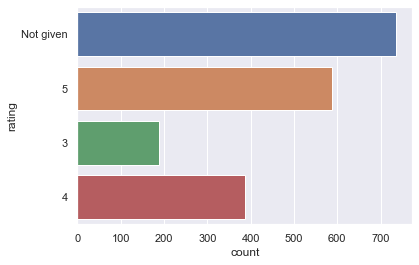

In [7]:
print(df['rating'].value_counts()) # Using frequecy count to determine the number of unique entries
print((df['rating'].value_counts())/df.shape[0]) # The percentage of data that the ratings represent
sns.countplot(data = df , y="rating") # For visual representation, the data is presented grapphically
plt.show()

#### Observations:
**736 orders** did not have ratings assigned, which represent about **38.8%** of the data. This could be as a result of users forgetting to give a rating or not going back to the app after delivery to give a rating. 

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on the distributions of all the relevant variables in the dataset. (5 marks)

Exploring general frequency counts

In [8]:
df_1=df.copy()
df_1['rating'] = df_1['rating'].apply(lambda x: np.math.nan if x =='Not given' else x).astype('float')

display(df_1.head())

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24


C:\Users\aabdurra\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


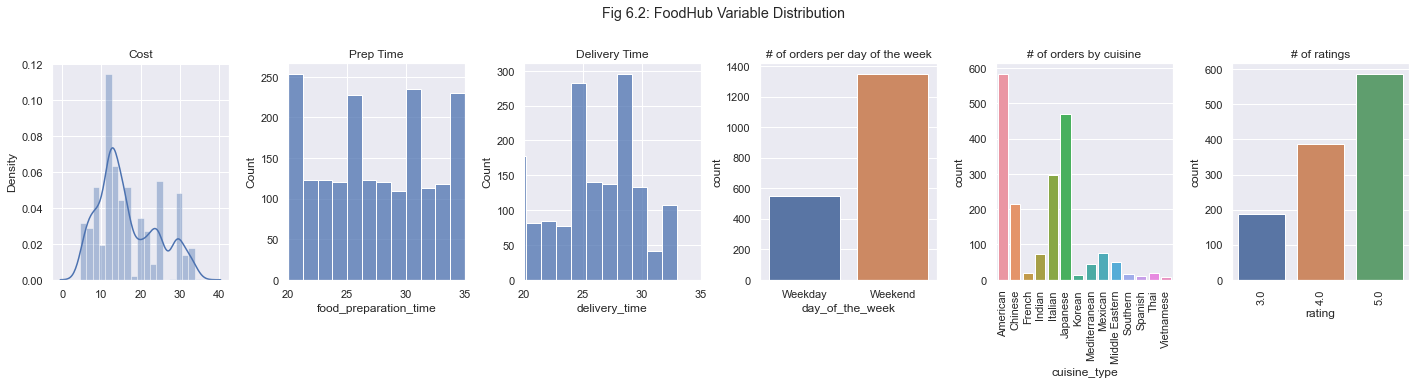

In [9]:
fig, axes = plt.subplots(1, 6, sharex=False, figsize=(20,4))
fig.tight_layout(pad=2, h_pad=2, w_pad=2)
fig.suptitle('Fig 6.2: FoodHub Variable Distribution', y=1.1)

sns.distplot(ax=axes[0], x=df_1['cost_of_the_order'])
axes[0].set_title('Cost')

sns.histplot(ax=axes[1], x=df_1['food_preparation_time']).set(xlim=(20,35))
axes[1].set_title('Prep Time')

sns.histplot(ax=axes[2], x=df_1['delivery_time']).set(xlim=(20,35))
axes[2].set_title('Delivery Time')

sns.countplot(ax=axes[3], x=df_1['day_of_the_week'])
axes[3].set_title('# of orders per day of the week')

g=sns.countplot(ax=axes[4], x=df_1['cuisine_type'])
axes[4].set_title('# of orders by cuisine')
axes[4].set_xticklabels(g.get_xticklabels(), rotation=90)

g=sns.countplot(ax=axes[5], x=df_1['rating'].sort_values(ascending=False))
axes[5].set_title('# of ratings')
axes[5].set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()



###### Observations:

### Question 7: Write the code to find the top 5 restaurants that have received the highest number of orders. (1 mark)

In [10]:
# write the code here
# Assuming that each order id is unique to an order; a simple frequency count of the restaurants should give number of orders per restaurant
df_1.groupby('restaurant_name')['order_id'].count().nlargest(5) # group the restaurants by name and count the number of orders and display the 5 highest count.

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64

In [11]:
df_1['restaurant_name'].value_counts().head() #value counts already sorts the values so using the head() method we are able to repeat the top 5 restaurants

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

In [12]:
df_1['order_id'].duplicated().sum() # Confirm that there is no duplicated order number and the order Id is uique to an order.

0

#### Observations:
Shake Shack had the most orders with 219 and the next 4 are as follows:  
The Meatball Shop;            132  
Blue Ribbon Sushi;            119  
Blue Ribbon Fried Chicken;     96  
Parm;                          68  

A google search of these restaurants show that they are fast food restaurants with more than 1 location. May be their size could be a factor in why they have many orders. It would be interesting to find out where these orders originate from (geographically).

### Question 8: Write the code to find the most popular cuisine on weekends. (1 mark)

In [13]:
# write the code here
display(df_1[df_1['day_of_the_week']=='Weekend']['cuisine_type'].value_counts().nlargest(3))

data_day_cuisine = df_1.set_index(['day_of_the_week','cuisine_type'])
display(data_day_cuisine.groupby(level=[0,1]).count()['order_id'])

American    415
Japanese    335
Italian     207
Name: cuisine_type, dtype: int64

day_of_the_week  cuisine_type  
Weekday          American          169
                 Chinese            52
                 French              5
                 Indian             24
                 Italian            91
                 Japanese          135
                 Korean              2
                 Mediterranean      14
                 Mexican            24
                 Middle Eastern     17
                 Southern            6
                 Spanish             1
                 Thai                4
                 Vietnamese          3
Weekend          American          415
                 Chinese           163
                 French             13
                 Indian             49
                 Italian           207
                 Japanese          335
                 Korean             11
                 Mediterranean      32
                 Mexican            53
                 Middle Eastern     32
                 Southern       

#### Observations:
On the weekend, The most popular cusine is American. Japanese and Italian come in 2nd and 3rd.

### Question 9: Write the code to find the number of total orders where the cost is above 20 dollars. What is the percentage of such orders in the dataset?  (1 mark)

In [14]:
# write the code here
total_orders = df_1.shape[0]
total_num_above_20 = df_1[df_1['cost_of_the_order']>20].shape[0]
pct = (total_num_above_20/total_orders)*100
print(total_num_above_20)
print(pct)

555
29.24130663856691


In [15]:
df_1[df_1['cost_of_the_order']>20]['cost_of_the_order'].mean()

26.585423423423443

#### Observations:
the total number of orders **above 20USD is 555** which corresponds to about **29.24%** of the dataset. Which means the majority of the orders cost less than 20USD. Perhaps customers are comfortable paying upto ~20 USD for orders. This should be a consideration when adding restaurants to the website. 

### Question 10: Write the code to find the mean delivery time based on this dataset. (1 mark)

In [16]:
# write the code here
mean_delivery = df_1['delivery_time'].mean()
print ('The mean delivery time of this dataset is {}'.format(mean_delivery))


The mean delivery time of this dataset is 24.161749209694417


#### Observations:
The mean delivery time from the dataset is **24.16 mins**. This would indicate that when considering new restaurants to join the app, Foodhub should consider where its main users are and 

### Question 11: Suppose the company has decided to give a free coupon of 15 dollars to the customer who has spent the maximum amount on a single order. Write the code to find the ID of the customer along with the order details. (1 mark)

In [17]:
max_amount = df_1[df_1['cost_of_the_order'] == df_1['cost_of_the_order'].max()]
display(max_amount)

print('The customer that spent the max amount per order is **{}**'.format(max_amount.iloc[0,1]))

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
573,1477814,62359,Pylos,Mediterranean,35.41,Weekday,4.0,21,29


The customer that spent the max amount per order is **62359**


#### Observations:
**Customer ID 62359** spent the most per order from the given data set, amounting to 35.41 USD. The customer spent it on Mediterranean on a weekday and gave it a good rating of 4

### Multivariate Analysis

### Question 12: Perform bivariate/multivariate analysis to explore relationships between the important variables in the dataset. (7 marks)

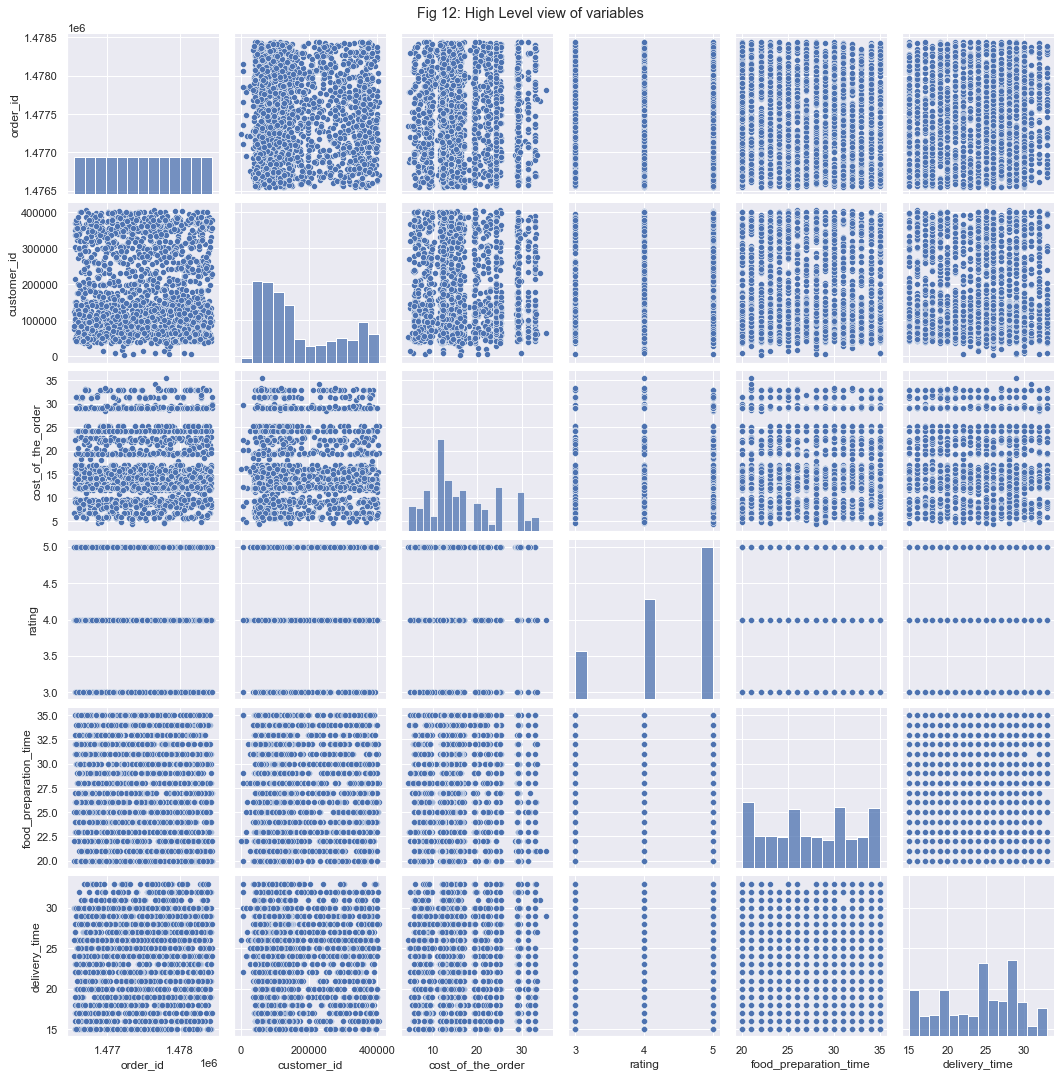

In [18]:
sns.pairplot(df_1).fig.suptitle("Fig 12: High Level view of variables", y=1.0)# Using a a pairplot as a high level visual to see if any relationship stands out 
plt.show()

In [19]:
df_1.corr()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
order_id,1.000000,-0.013960,0.021171,0.006308,-0.007026,0.009690
customer_id,-0.013960,1.000000,-0.001322,0.007753,-0.030330,-0.009885
cost_of_the_order,0.021171,-0.001322,1.000000,0.033983,0.041527,-0.029949
rating,0.006308,0.007753,0.033983,1.000000,-0.006083,-0.009804
food_preparation_time,-0.007026,-0.030330,0.041527,-0.006083,1.000000,0.011094
delivery_time,0.009690,-0.009885,-0.029949,-0.009804,0.011094,1.000000


### 12.1 - Cuisine Type

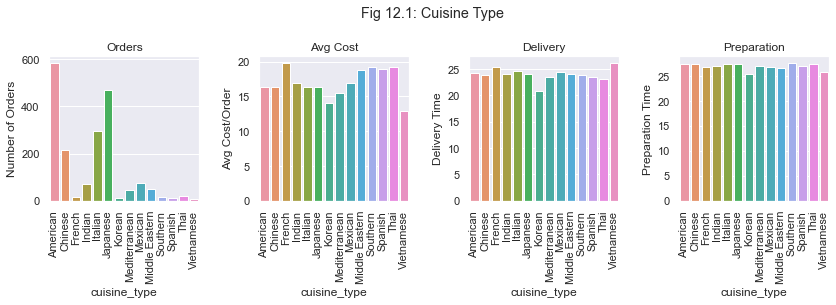

In [20]:
fig, axes = plt.subplots(1, 4, sharex=False, figsize=(12,3))
fig.tight_layout(pad=2, h_pad=2, w_pad=2)
fig.suptitle('Fig 12.1: Cuisine Type', y=1.1)

# Find out the number of orders per cuisine. Do customers have a favorite cuisine?
cuisine_orders = df_1.groupby('cuisine_type').count().reset_index() #group the data set by cuisine and take the mean of the target variable
g= sns.barplot(ax=axes[0], data=cuisine_orders, x='cuisine_type', y='order_id', color=None)
axes[0].set_title('Orders')
axes[0].set_xticklabels(g.get_xticklabels(), rotation=90)
axes[0].set_ylabel('Number of Orders')

#Find out if the if the avg amount spent on an order is related to the type of cuisine
cuisine_cost = df_1.groupby('cuisine_type').mean().reset_index() #group the data set by cuisine and take the mean of the target variable
sns.barplot(ax=axes[1], data=cuisine_cost, x='cuisine_type', y='cost_of_the_order', order=cuisine_cost['cuisine_type'])
axes[1].set_title('Avg Cost')
axes[1].set_xticklabels(g.get_xticklabels(), rotation=90)
axes[1].set_ylabel('Avg Cost/Order')

# Find out if the type of cuisine affects the delivery time
cuisine_cost = df_1.groupby('cuisine_type').mean().reset_index()#group the data set by cuisine and take the mean of the target variable
sns.barplot(ax=axes[2], data=cuisine_cost, x='cuisine_type', y='delivery_time', order=cuisine_cost['cuisine_type'])
axes[2].set_title('Delivery')
axes[2].set_xticklabels(g.get_xticklabels(), rotation=90)
axes[2].set_ylabel('Delivery Time')

# Find out if the preparation time is affected by the type of cuisine? are there cuisines that are easier to prepare? Would that ultimately reduce the order time?
cuisine_cost = df_1.groupby('cuisine_type').mean().reset_index()#group the data set by cuisine and take the mean of the target variable
sns.barplot(ax=axes[3], data=cuisine_cost, x='cuisine_type', y='food_preparation_time', order=cuisine_cost['cuisine_type'])
axes[3].set_title('Preparation')
axes[3].set_xticklabels(g.get_xticklabels(), rotation=90)
axes[3].set_ylabel('Preparation Time')

plt.show()

sns.barplot(ax=axes[3], data=cuisine_cost, x='cuisine_type', y='food_preparation_time', order=cuisine_cost['cuisine_type'])

## 12.2

In [21]:
# Create a data set that shows the number of orders per restaurant and averages of cost per order, delivery time and prep time

# Create a data set of the mean of cost per order, delivery time and prep time and rename the columns

mean_per_rest = (df_1.groupby('restaurant_name', as_index=False).mean().drop(['order_id','customer_id'], axis=1))
mean_per_rest = mean_per_rest.rename({'cost_of_the_order':'avg cost per order', 'food_preparation_time':'prep time','delivery_time':'delivery time' }, axis=1)

# Create a data set of the number of orders per restaurant
orders_per_rest = pd.Series(df_1.groupby('restaurant_name')['order_id'].count()).reset_index()
orders_per_rest =orders_per_rest.rename({'order_id':'number of orders'}, axis=1)

# Merge the 2 above data sets and sort by the number of orders in descending order
merged_data = (pd.merge(mean_per_rest,orders_per_rest, how='left').sort_values('number of orders', ascending=False)).reset_index().drop('index', axis=1)
merged_data.columns
merged_data = merged_data[['restaurant_name', 'number of orders','avg cost per order', 'prep time', 'delivery time','rating'
       ]]
merged_data[:10]

merged_data.nlargest(10,'rating')

,restaurant_name,number of orders,avg cost per order,prep time,delivery time,rating
43,Vanessa's Dumpling House,9,14.205556,25.555556,24.222222,5.0
45,Dos Caminos,8,11.902500,28.625000,24.500000,5.0
50,Donburi-ya,7,10.790000,26.142857,26.142857,5.0
58,Junoon,5,23.050000,25.200000,26.600000,5.0
60,Vezzo Thin Crust Pizza,5,13.748000,27.000000,24.800000,5.0
61,Mission Cantina,5,17.490000,28.000000,23.800000,5.0
63,Yama 49,5,20.322000,26.000000,25.800000,5.0
66,Saravanaa Bhavan,5,14.038000,29.200000,27.000000,5.0
70,Lantern Thai Kitchen,4,19.572500,28.250000,25.000000,5.0
75,Grand Sichuan International,4,19.522500,31.000000,29.250000,5.0


### 12.3 - Restaurants

C:\Users\aabdurra\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\aabdurra\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0, flags=flags)


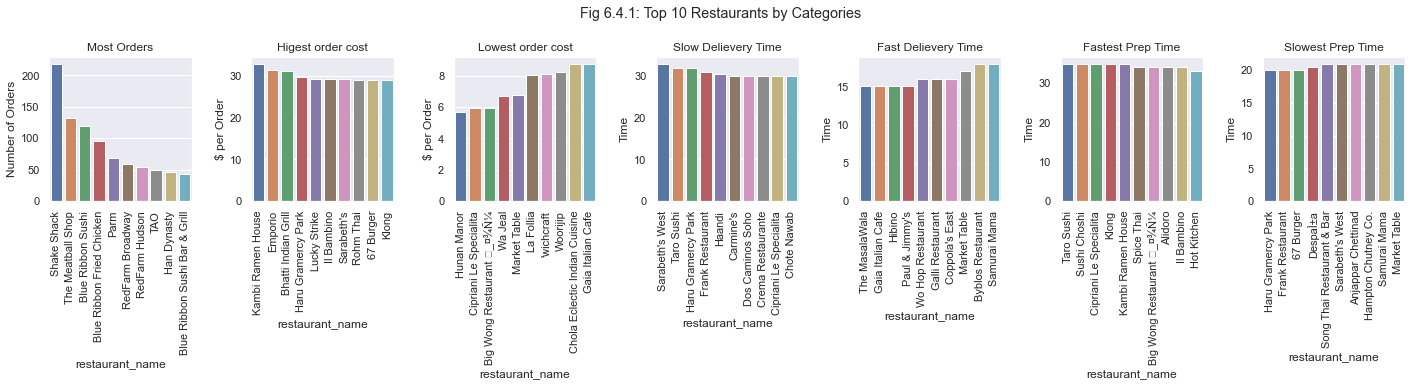

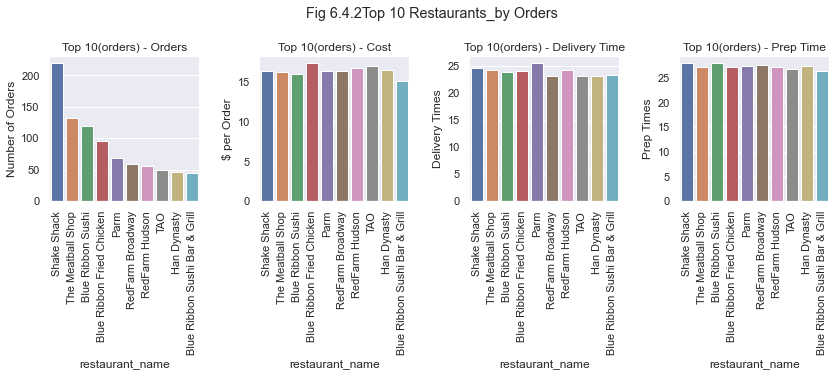

In [22]:
# # How many distinct restaurants ?
# #----------------------------------------------------------------------------------------------------------------------------------------------
# #Reviewing the top 10 restaurants in all categories
# #----------------------------------------------------------------------------------------------------------------------------------------------

fig, axes = plt.subplots(1, 7, sharex=False, figsize=(20,3))
fig.tight_layout(pad=2, h_pad=2, w_pad=2)
fig.suptitle('Fig 6.4.1: Top 10 Restaurants by Categories', y=1.1)

# # Top 10 in restaurants
g=sns.barplot(ax=axes[0],data=merged_data.nlargest(10,'number of orders'), x='restaurant_name', y='number of orders',order=merged_data.nlargest(10,'number of orders')['restaurant_name'])
axes[0].set_title('Most Orders')
axes[0].set_ylabel('Number of Orders')
axes[0].set_xticklabels(g.get_xticklabels(), rotation=90)

# # Top 10 highest order cost
g=sns.barplot(ax=axes[1],data=merged_data.nlargest(10,'avg cost per order'), x='restaurant_name', y='avg cost per order',order=merged_data.nlargest(10,'avg cost per order')['restaurant_name'])
axes[1].set_title('Higest order cost')
axes[1].set_ylabel('$ per Order')
axes[1].set_xticklabels(g.get_xticklabels(), rotation=90)

# # Top 10 lowest order cost
g=sns.barplot(ax=axes[2],data=merged_data.nsmallest(10,'avg cost per order'), x='restaurant_name', y='avg cost per order',order=merged_data.nsmallest(10,'avg cost per order')['restaurant_name'])
axes[2].set_title('Lowest order cost')
axes[2].set_ylabel('$ per Order')
axes[2].set_xticklabels(g.get_xticklabels(), rotation=90)

# # Top 10 fastest delivery
g=sns.barplot(ax=axes[3],data=merged_data.nlargest(10,'delivery time'), x='restaurant_name', y='delivery time',order=merged_data.nlargest(10,'delivery time')['restaurant_name'])
axes[3].set_title('Slow Delievery Time')
axes[3].set_ylabel('Time')
axes[3].set_xticklabels(g.get_xticklabels(), rotation=90)

# # Top 10 slowest delivery
g=sns.barplot(ax=axes[4],data=merged_data.nsmallest(10,'delivery time'), x='restaurant_name', y='delivery time',order=merged_data.nsmallest(10,'delivery time')['restaurant_name'])
axes[4].set_title('Fast Delievery Time')
axes[4].set_ylabel('Time')
axes[4].set_xticklabels(g.get_xticklabels(), rotation=90)


# # Top 10 fastest prep
g=sns.barplot(ax=axes[5],data=merged_data.nlargest(10,'prep time'), x='restaurant_name', y='prep time',order=merged_data.nlargest(10,'prep time')['restaurant_name'])
axes[5].set_title('Fastest Prep Time')
axes[5].set_ylabel('Time')
axes[5].set_xticklabels(g.get_xticklabels(), rotation=90)

# # Top 10 slowest prep
g=sns.barplot(ax=axes[6],data=merged_data.nsmallest(10,'prep time'), x='restaurant_name', y='prep time',order=merged_data.nsmallest(10,'prep time')['restaurant_name'])
axes[6].set_title('Slowest Prep Time')
axes[6].set_ylabel('Time')
axes[6].set_xticklabels(g.get_xticklabels(), rotation=90)


plt.show()


#----------------------------------------------------------------------------------------------------------------------------------------------
# Reviewing the top 10 restaurants based on number of orders
#----------------------------------------------------------------------------------------------------------------------------------------------

fig, axes = plt.subplots(1, 4, sharex=False, figsize=(12,3))
fig.tight_layout(pad=2, h_pad=2, w_pad=2)
fig.suptitle('Fig 6.4.2Top 10 Restaurants_by Orders', y=1.1)

# Number of orders vs Restaurants
g=sns.barplot(ax=axes[0],data=merged_data[:10], x='restaurant_name', y='number of orders',order=merged_data[:10]['restaurant_name'])
axes[0].set_title('Top 10(orders) - Orders')
axes[0].set_ylabel('Number of Orders')
axes[0].set_xticklabels(g.get_xticklabels(), rotation=90)

# # # top10_byorder vs avg cost/order
g=sns.barplot(ax=axes[1],data=merged_data[:10], x='restaurant_name', y='avg cost per order',order=merged_data[:10]['restaurant_name'])
axes[1].set_title('Top 10(orders) - Cost')
axes[1].set_ylabel('$ per Order')
axes[1].set_xticklabels(g.get_xticklabels(), rotation=90)

# # Restaurants vs Delivery time
g=sns.barplot(ax=axes[2],data=merged_data[:10], x='restaurant_name', y='delivery time',order=merged_data[:10]['restaurant_name'])
axes[2].set_title('Top 10(orders) - Delivery Time')
axes[2].set_ylabel('Delivery Times')
axes[2].set_xticklabels(g.get_xticklabels(), rotation=90)

# # Restaurants vs Prep time
g=sns.barplot(ax=axes[3],data=merged_data[:10], x='restaurant_name', y='prep time',order=merged_data[:10]['restaurant_name'])
axes[3].set_title('Top 10(orders) - Prep Time')
axes[3].set_ylabel('Prep Times')
axes[3].set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()


In [23]:
df.describe().drop(['order_id', 'customer_id'], axis=1)

,cost_of_the_order,food_preparation_time,delivery_time
count,1898.000000,1898.000000,1898.000000
mean,16.498851,27.371970,24.161749
std,7.483812,4.632481,4.972637
min,4.470000,20.000000,15.000000
25%,12.080000,23.000000,20.000000
50%,14.140000,27.000000,25.000000
75%,22.297500,31.000000,28.000000
max,35.410000,35.000000,33.000000


### 12.4 - Rating

In [24]:
merged_data.head()

,restaurant_name,number of orders,avg cost per order,prep time,delivery time,rating
0,Shake Shack,219,16.344886,27.945205,24.662100,4.278195
1,The Meatball Shop,132,16.251591,27.181818,24.242424,4.511905
2,Blue Ribbon Sushi,119,15.999580,27.924370,23.941176,4.219178
3,Blue Ribbon Fried Chicken,96,17.315521,27.197917,24.145833,4.328125
4,Parm,68,16.364118,27.308824,25.500000,4.128205


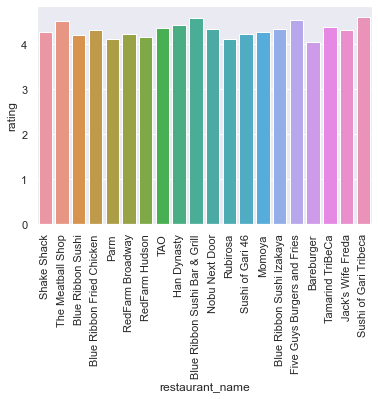

In [25]:
g=sns.barplot(data=merged_data[:20],x='restaurant_name', y='rating',order=merged_data[:20]['restaurant_name'] )
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

### 12.5 - Day of the week

day_of_the_week  cuisine_type  
Weekday          American          169
                 Chinese            52
                 French              5
                 Indian             24
                 Italian            91
                 Japanese          135
                 Korean              2
                 Mediterranean      14
                 Mexican            24
                 Middle Eastern     17
                 Southern            6
                 Spanish             1
                 Thai                4
                 Vietnamese          3
Weekend          American          415
                 Chinese           163
                 French             13
                 Indian             49
                 Italian           207
                 Japanese          335
                 Korean             11
                 Mediterranean      32
                 Mexican            53
                 Middle Eastern     32
                 Southern       

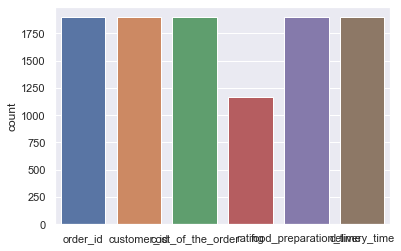

In [26]:
data_day_cuisine = df_1.set_index(['day_of_the_week','cuisine_type'])
cuisine = data_day_cuisine.groupby(level=[0,1]).count()['order_id']
display(cuisine)

sns.countplot(data=data_day_cuisine)

Obeservation:
The graphs above confirm the 5 summary info that was calculated earlier:  
**Cost of Order**: ranges from about 4.5 USD to about 35 USD. Seems customers are comfortable paying around 15-20 USD - Perhaps look into restarants that would have an average cost in this area  
**Delivery Time**: ranged between 15-33 mins with a majority of the orders being around 24-25 mins. Means that customers are willing to tolerate an average delivery time of about 24-25 mins  
**Prep Time**: ranged between 20-35 mins with most of the top orders hovering around 25 mins.   
**Order Time** = Looking at the prep time and delivery time together, seems customers are willing to wait about 50-55 mins for their order. this could be a selection criteria for adding new restaurants. 

### Question 13: Suppose the company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Write the code to find the restaurants fulfilling the criteria to get the promotional offer. (2 marks)

In [93]:
rating_stat=df_1[['restaurant_name','rating']].groupby('restaurant_name').agg(['count','mean'])
rating_stat[(rating_stat['rating']['count']>50) & (rating_stat['rating']['mean']>4) ]

rating          
                           count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     64  4.328125
Blue Ribbon Sushi             73  4.219178
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905

#### Observations:


### Question 14: Suppose the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Write the code to find the net revenue generated on all the orders given in the dataset. (2 marks)

In [122]:
# write the code here
df_1['revenue']=0 # initiate a 0 column in the dataframe
df_1['revenue']=df_1['cost_of_the_order'].apply(lambda x: 0.25*x if x>20.0 else (0.15*x if 5<x and x<=20 else 0)) # using the lammda funtion to apply the mathematical conditions and assign the result to the 'revenue' column
revenue = df_1['revenue'].sum() #sum the column 

# confirm calculation another way
revenue_check = (test['cost_of_the_order'][(test['cost_of_the_order']>5) & (test['cost_of_the_order']<=20) ].sum())*0.15 + (test['cost_of_the_order'][test['cost_of_the_order']>20 ].sum())*0.25
print(revenue, revenue_check)

df_1.head()

6166.303 6166.303


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,1.7385


#### Observations:


### Question 15: Suppose the company wants to analyze the total time required to deliver the food. Write the code to find out the percentage of orders that have more than 60 minutes of total delivery time. (2 marks)

Note: The total delivery time is the summation of the food preparation time and delivery time. 

In [129]:
# write the code here
df_1['total_del_time']= df_1['food_preparation_time']+df_1['delivery_time']
((df_1[df_1['total_del_time']>60].shape[0])/df_1.shape[0])*100

10.537407797681771

#### Observations:
Total delivery time = food prep time + delivery time  


### Question 16: Suppose the company wants to analyze the delivery time of the orders on weekdays and weekends. Write the code to find the mean delivery time on weekdays and weekends. Write your observations on the results. (2 marks)

In [141]:
# write the code here
data_day_delivery = df_1.set_index(['day_of_the_week'])
display(data_day_delivery.groupby(level=0).mean()['delivery_time'])
display(data_day_delivery.groupby(level=0).mean()['total_del_time'])
data_day_delivery.groupby(level=0).mean()['food_preparation_time']

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

day_of_the_week
Weekday    55.552102
Weekend    49.906736
Name: total_del_time, dtype: float64

day_of_the_week
Weekday    27.212066
Weekend    27.436714
Name: food_preparation_time, dtype: float64

#### Observations:
As expected the day of the week should not have much of an impact on the time it takes to prepare the food. The delivery time reduced by almost 6 mins over the weekend. It could be assumed that most of the restaurants are located places that may be busier during the weekdays. Ao perhaps, in addition to all the other factors discussed above, FoodHub should spend some time looking more into core area seems thats where most of their customers (based on these data set) like to order from. Also to improve the customer experience, FoodHUb should consider restaurants that open on weekends. 

### Conclusion and Recommendations

### **Question 17:** Write the conclusions and business recommendations derived from the analysis. (5 marks)

#### Insights: